<a href="https://colab.research.google.com/github/gcbirat12/All_Projects/blob/main/Time_Series_Apple_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [21]:
import yfinance as yf

In [38]:
df = yf.download('AAPL', start = '2012-01-01', end = '2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [39]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433827,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500645,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639426,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771559,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751298,394024400


In [40]:
df = df.drop(['Open','High','Low','Volume','Adj Close'], axis =1)

In [41]:
df.head()

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786


In [42]:
df.reset_index(inplace=True)

df = df.set_index('Date')


<Axes: xlabel='Date'>

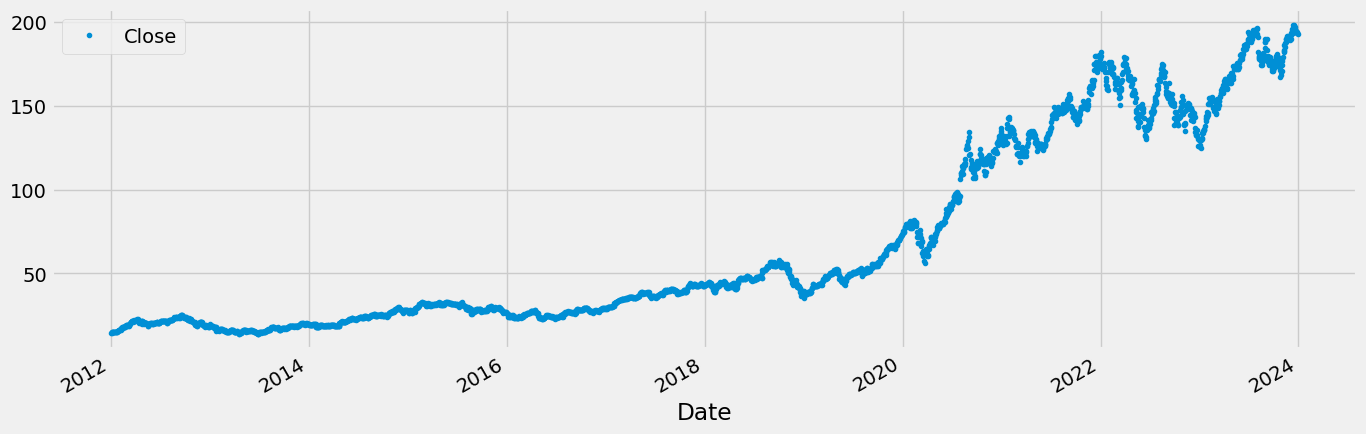

In [44]:
df.plot(style ='.',
        figsize = (15,5),
        color = color_pal[0])

#Train/Test Split

In [45]:
train = df.loc[df.index < '01-01-2021']
test = df.loc[df.index >= '01-01-2021']

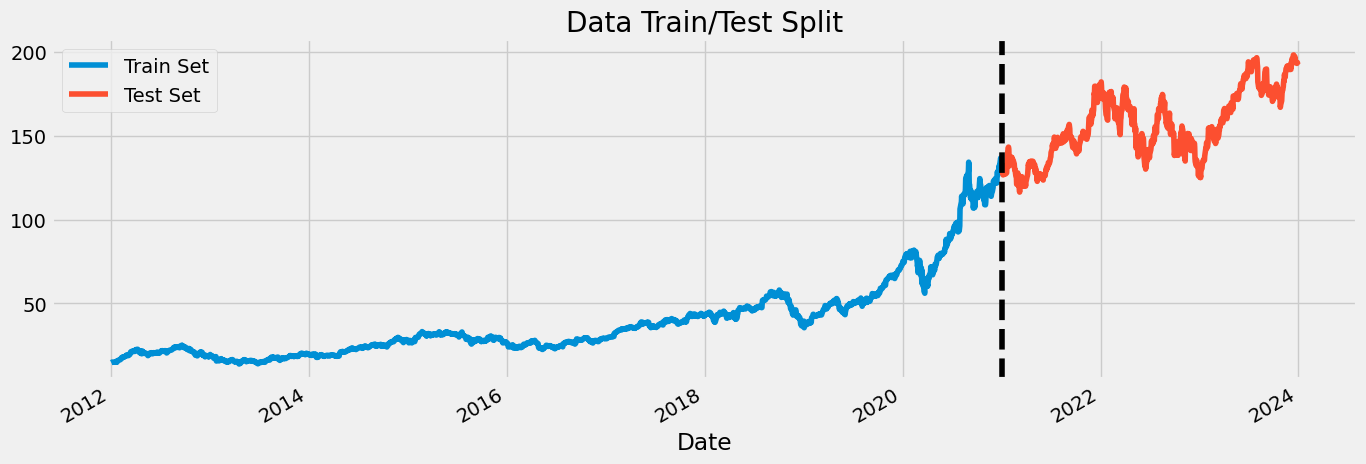

In [49]:
fig, ax = plt.subplots(figsize= (15,5))

train.plot (ax = ax, label = 'Train Set', title = "Data Train/Test Split")
test.plot (ax = ax, label ='Test Set')
ax.axvline('01-01-2021', color = 'black', ls = '--')
ax.legend(['Train Set', 'Test Set'])
plt.show()

<Axes: xlabel='Date'>

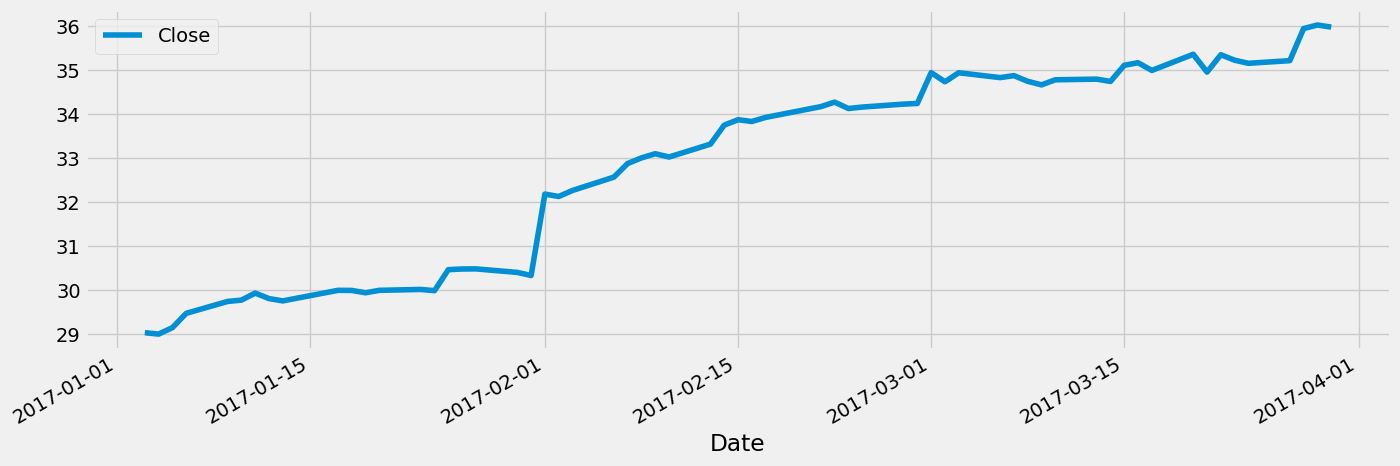

In [53]:
df.loc[(df.index > '01-01-2017') & (df.index<'03-31-2017')].plot(figsize=(15,5))

#Feature Creation

In [111]:
def create_features(df):

  """
  Create time series features based on the index for different periodes of time
  """
  df = df.copy()
  df['dayofweek'] = df.index.dayofweek
  df['month'] = df.index.month
  df['quarter'] = df.index.quarter
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

In [112]:
df = create_features(df)

In [114]:
df.head()

,Close,month,quarter,year,dayofweek,dayofyear
Date,,,,,,
2012-01-03,14.686786,1,1,2012,1,3
2012-01-04,14.765714,1,1,2012,2,4
2012-01-05,14.929643,1,1,2012,3,5
2012-01-06,15.085714,1,1,2012,4,6
2012-01-09,15.061786,1,1,2012,0,9


# Visualize features

<ipython-input-75-4b2e16f71e8d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'month', y= 'Close', palette="Greens")


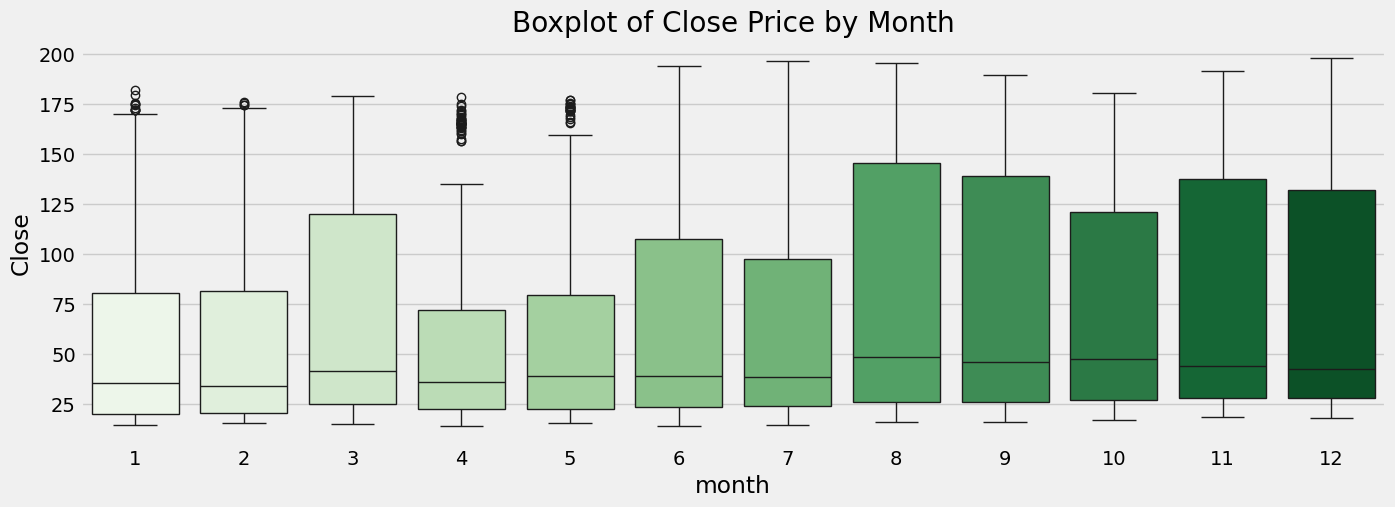

In [75]:
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(data = df, x = 'month', y= 'Close', palette="Greens")
ax.set_title('Boxplot of Close Price by Month')
plt.show()

<ipython-input-77-84efa05bc14e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'quarter', y= 'Close',palette="Blues")


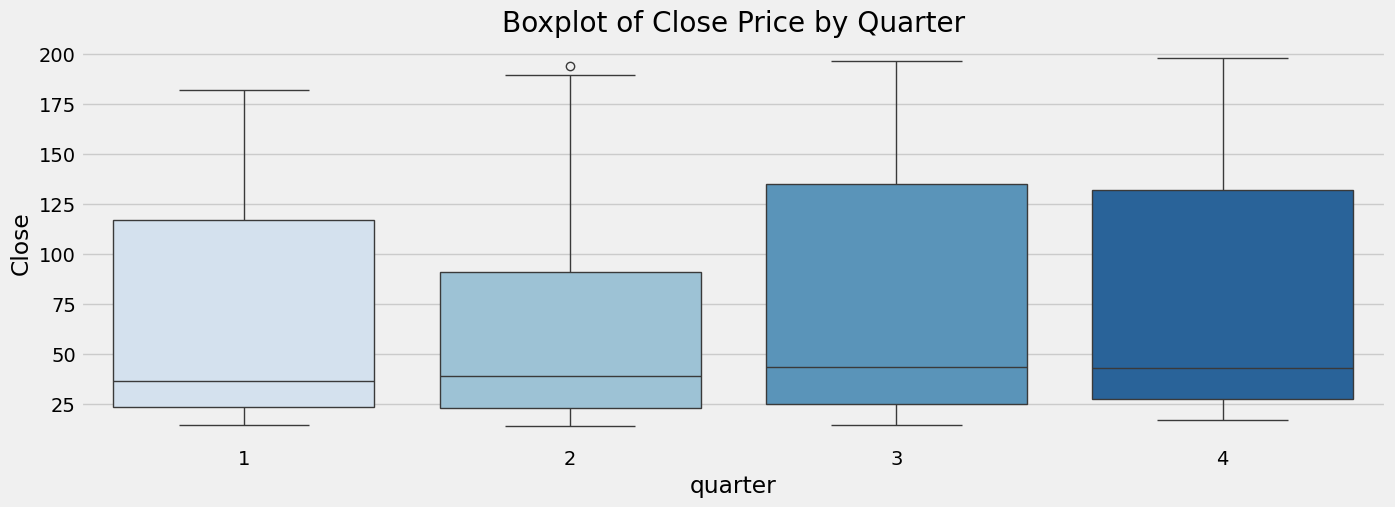

In [77]:
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(data = df, x = 'quarter', y= 'Close',palette="Blues")
ax.set_title('Boxplot of Close Price by Quarter')
plt.show()

<ipython-input-79-121fd718983c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'year', y= 'Close',palette="Oranges")


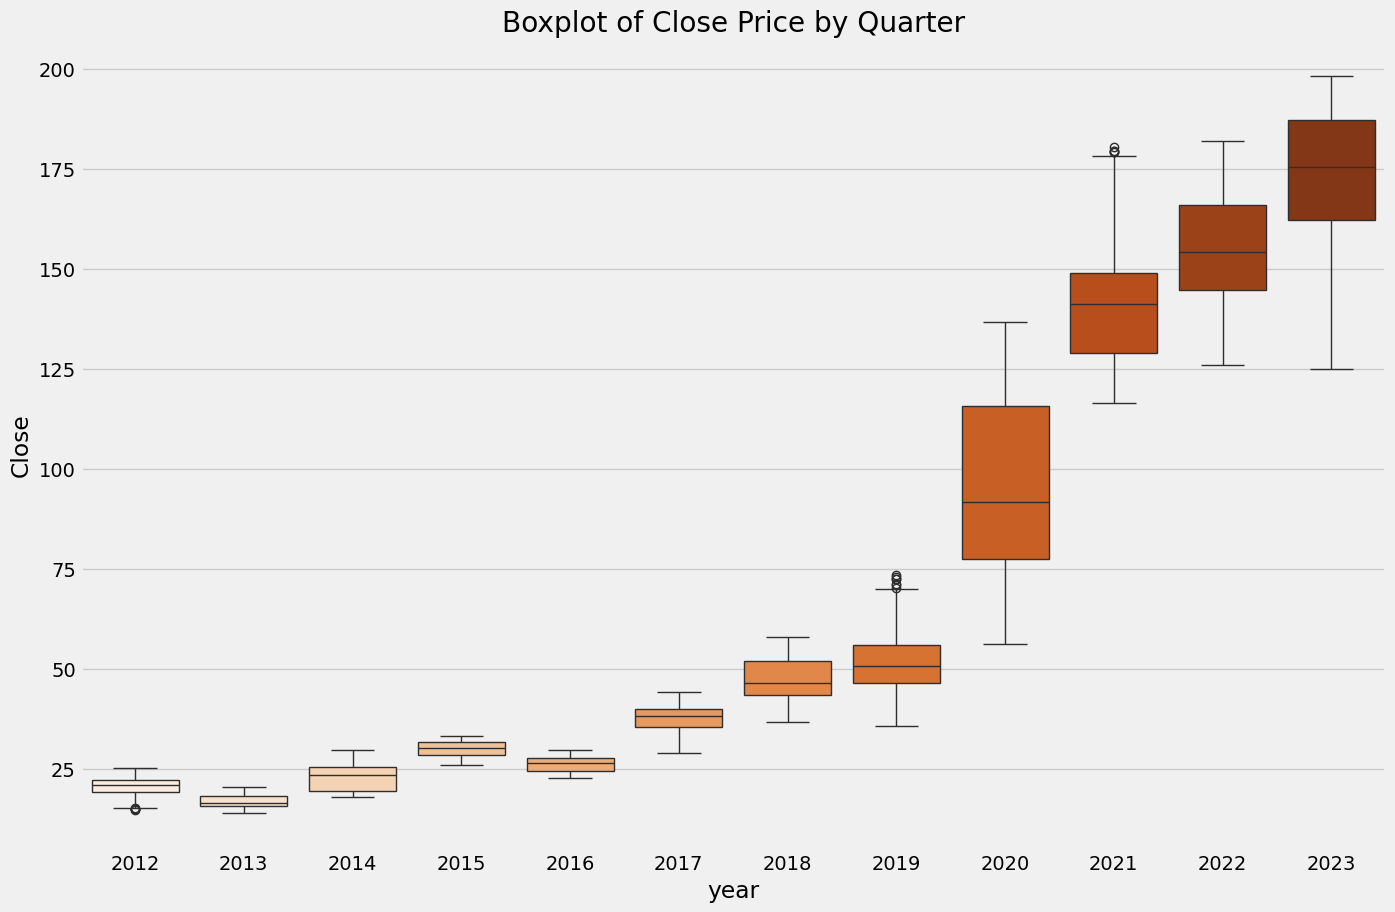

In [79]:
fig, ax = plt.subplots(figsize =(15,10))
sns.boxplot(data = df, x = 'year', y= 'Close',palette="Oranges")
ax.set_title('Boxplot of Close Price by Quarter')
plt.show()

#Creating a Model

In [115]:
train = create_features(train)
test = create_features(test)


In [116]:
df.columns

Index(['Close', 'month', 'quarter', 'year', 'dayofweek', 'dayofyear'], dtype='object')

In [117]:
FEATURES = ['month', 'quarter', 'year', 'dayofweek', 'dayofyear']
TARGET = 'Close'

In [118]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [131]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50,
                       learning_rate = 0.001)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 100)

[0]	validation_0-rmse:24.41881	validation_1-rmse:118.88145
[100]	validation_0-rmse:22.14487	validation_1-rmse:113.58240
[200]	validation_0-rmse:20.08695	validation_1-rmse:108.81683
[300]	validation_0-rmse:18.22421	validation_1-rmse:104.53181
[400]	validation_0-rmse:16.53838	validation_1-rmse:100.67948
[500]	validation_0-rmse:15.01262	validation_1-rmse:97.21306
[600]	validation_0-rmse:13.63209	validation_1-rmse:94.10095
[700]	validation_0-rmse:12.38288	validation_1-rmse:91.29430
[800]	validation_0-rmse:11.25212	validation_1-rmse:88.76978
[900]	validation_0-rmse:10.22907	validation_1-rmse:86.50416
[999]	validation_0-rmse:9.31243	validation_1-rmse:84.48508


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Feature Importance

In [132]:
fi = pd.DataFrame(data = reg.feature_importances_,
                  index = reg.feature_names_in_,
                  columns = ['importance'])

<Axes: title={'center': 'Feature Importance'}>

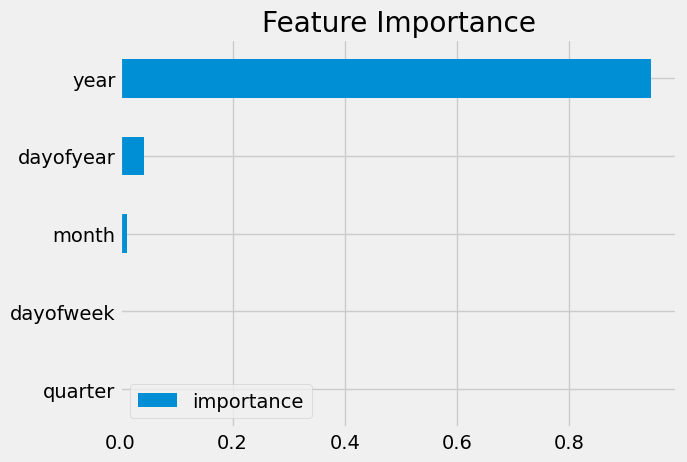

In [133]:
fi.sort_values(by = 'importance').plot(kind = 'barh', title = 'Feature Importance')

#Forecast on Test

In [136]:
test['prediction'] = reg.predict(X_test)

In [137]:
df = df.merge(test[['prediction']], how = 'left', left_index = True, right_index = True)

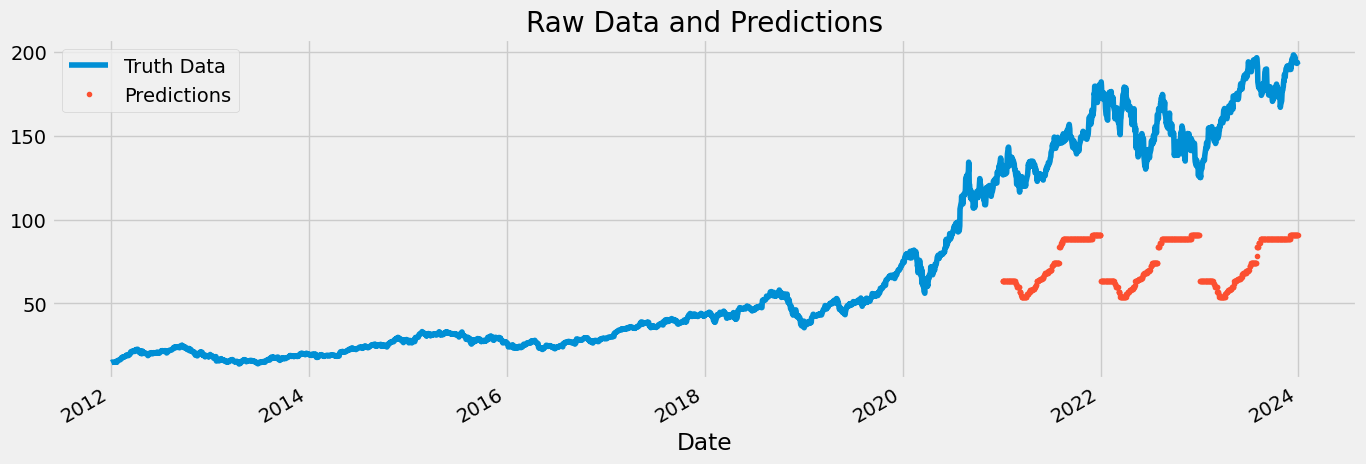

In [138]:
ax = df[['Close']].plot(figsize = (15,5))
df['prediction'].plot(ax = ax, style = '.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Predictions')
plt.show()